## Importación de Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

## Carga de Modelo de Bloques

In [3]:
MB= pd.read_csv('MB_G5.csv')
#Añadir las dimensiones originales del bloque en la base de datos analizada.
DimX=10
DimY=10
DimZ=9
#Se crea la variable tonelaje multiplicando volumen * densidad y se añade a la base de datos.
MB['TON']= MB['DENS']*DimX*DimY*DimZ/1000000
MB.head() #Visualizar cabezare de la base de datos.

,X,Y,Z,DENS,RECU,DURE,CATE,CUT,MOLY,AS,AU,AG,TON
0,5005.0,4305.0,1904.5,2.65,87,13.3,3,0.963750,0.0133,0.0033,0.0002,0.0,0.002385
1,5015.0,4305.0,1904.5,2.65,87,13.3,3,1.080875,0.0108,0.0030,0.0000,0.0,0.002385
2,5025.0,4305.0,1904.5,2.72,88,12.8,3,1.277500,0.0232,0.0031,0.0001,0.0,0.002448
3,5035.0,4305.0,1904.5,2.72,88,12.8,3,1.204625,0.0216,0.0032,0.0000,0.0,0.002448
4,5045.0,4305.0,1904.5,2.73,87,13.6,3,1.657500,0.0244,0.0111,0.0000,0.0,0.002457


## Marcas de clases

In [4]:
Rango=(1.5-0.001)/30 #Mientras más rango se tiene, más suave es la curva.
Mclase=[0.001]
valor=0
for cu in range(30):
    valor+= Rango
    Mclase.append(valor)

## Tonelajes y Ley Media

In [5]:
ton=[]
for cu in Mclase:
    MBp=MB[MB['CUT']>= cu]
    t= MBp['TON'].sum()
    ton.append(t)
Dif_ton=[]
TonXley=[]
for i in range(31):
    if i==30:
        vt=ton[i]
        pr= Mclase[i]*vt
        Dif_ton.append(vt)
        TonXley.append(pr) 
    else:
        vt=ton[i]-ton[i+1]
        pr= Mclase[i]*vt 
        Dif_ton.append(vt)
        TonXley.append(pr)
Ley_Media=[]
for e in range(31):
    lm=sum(TonXley[e:])/sum(Dif_ton[e:])
    Ley_Media.append(lm) 


## Curva Tonelave v/s Ley

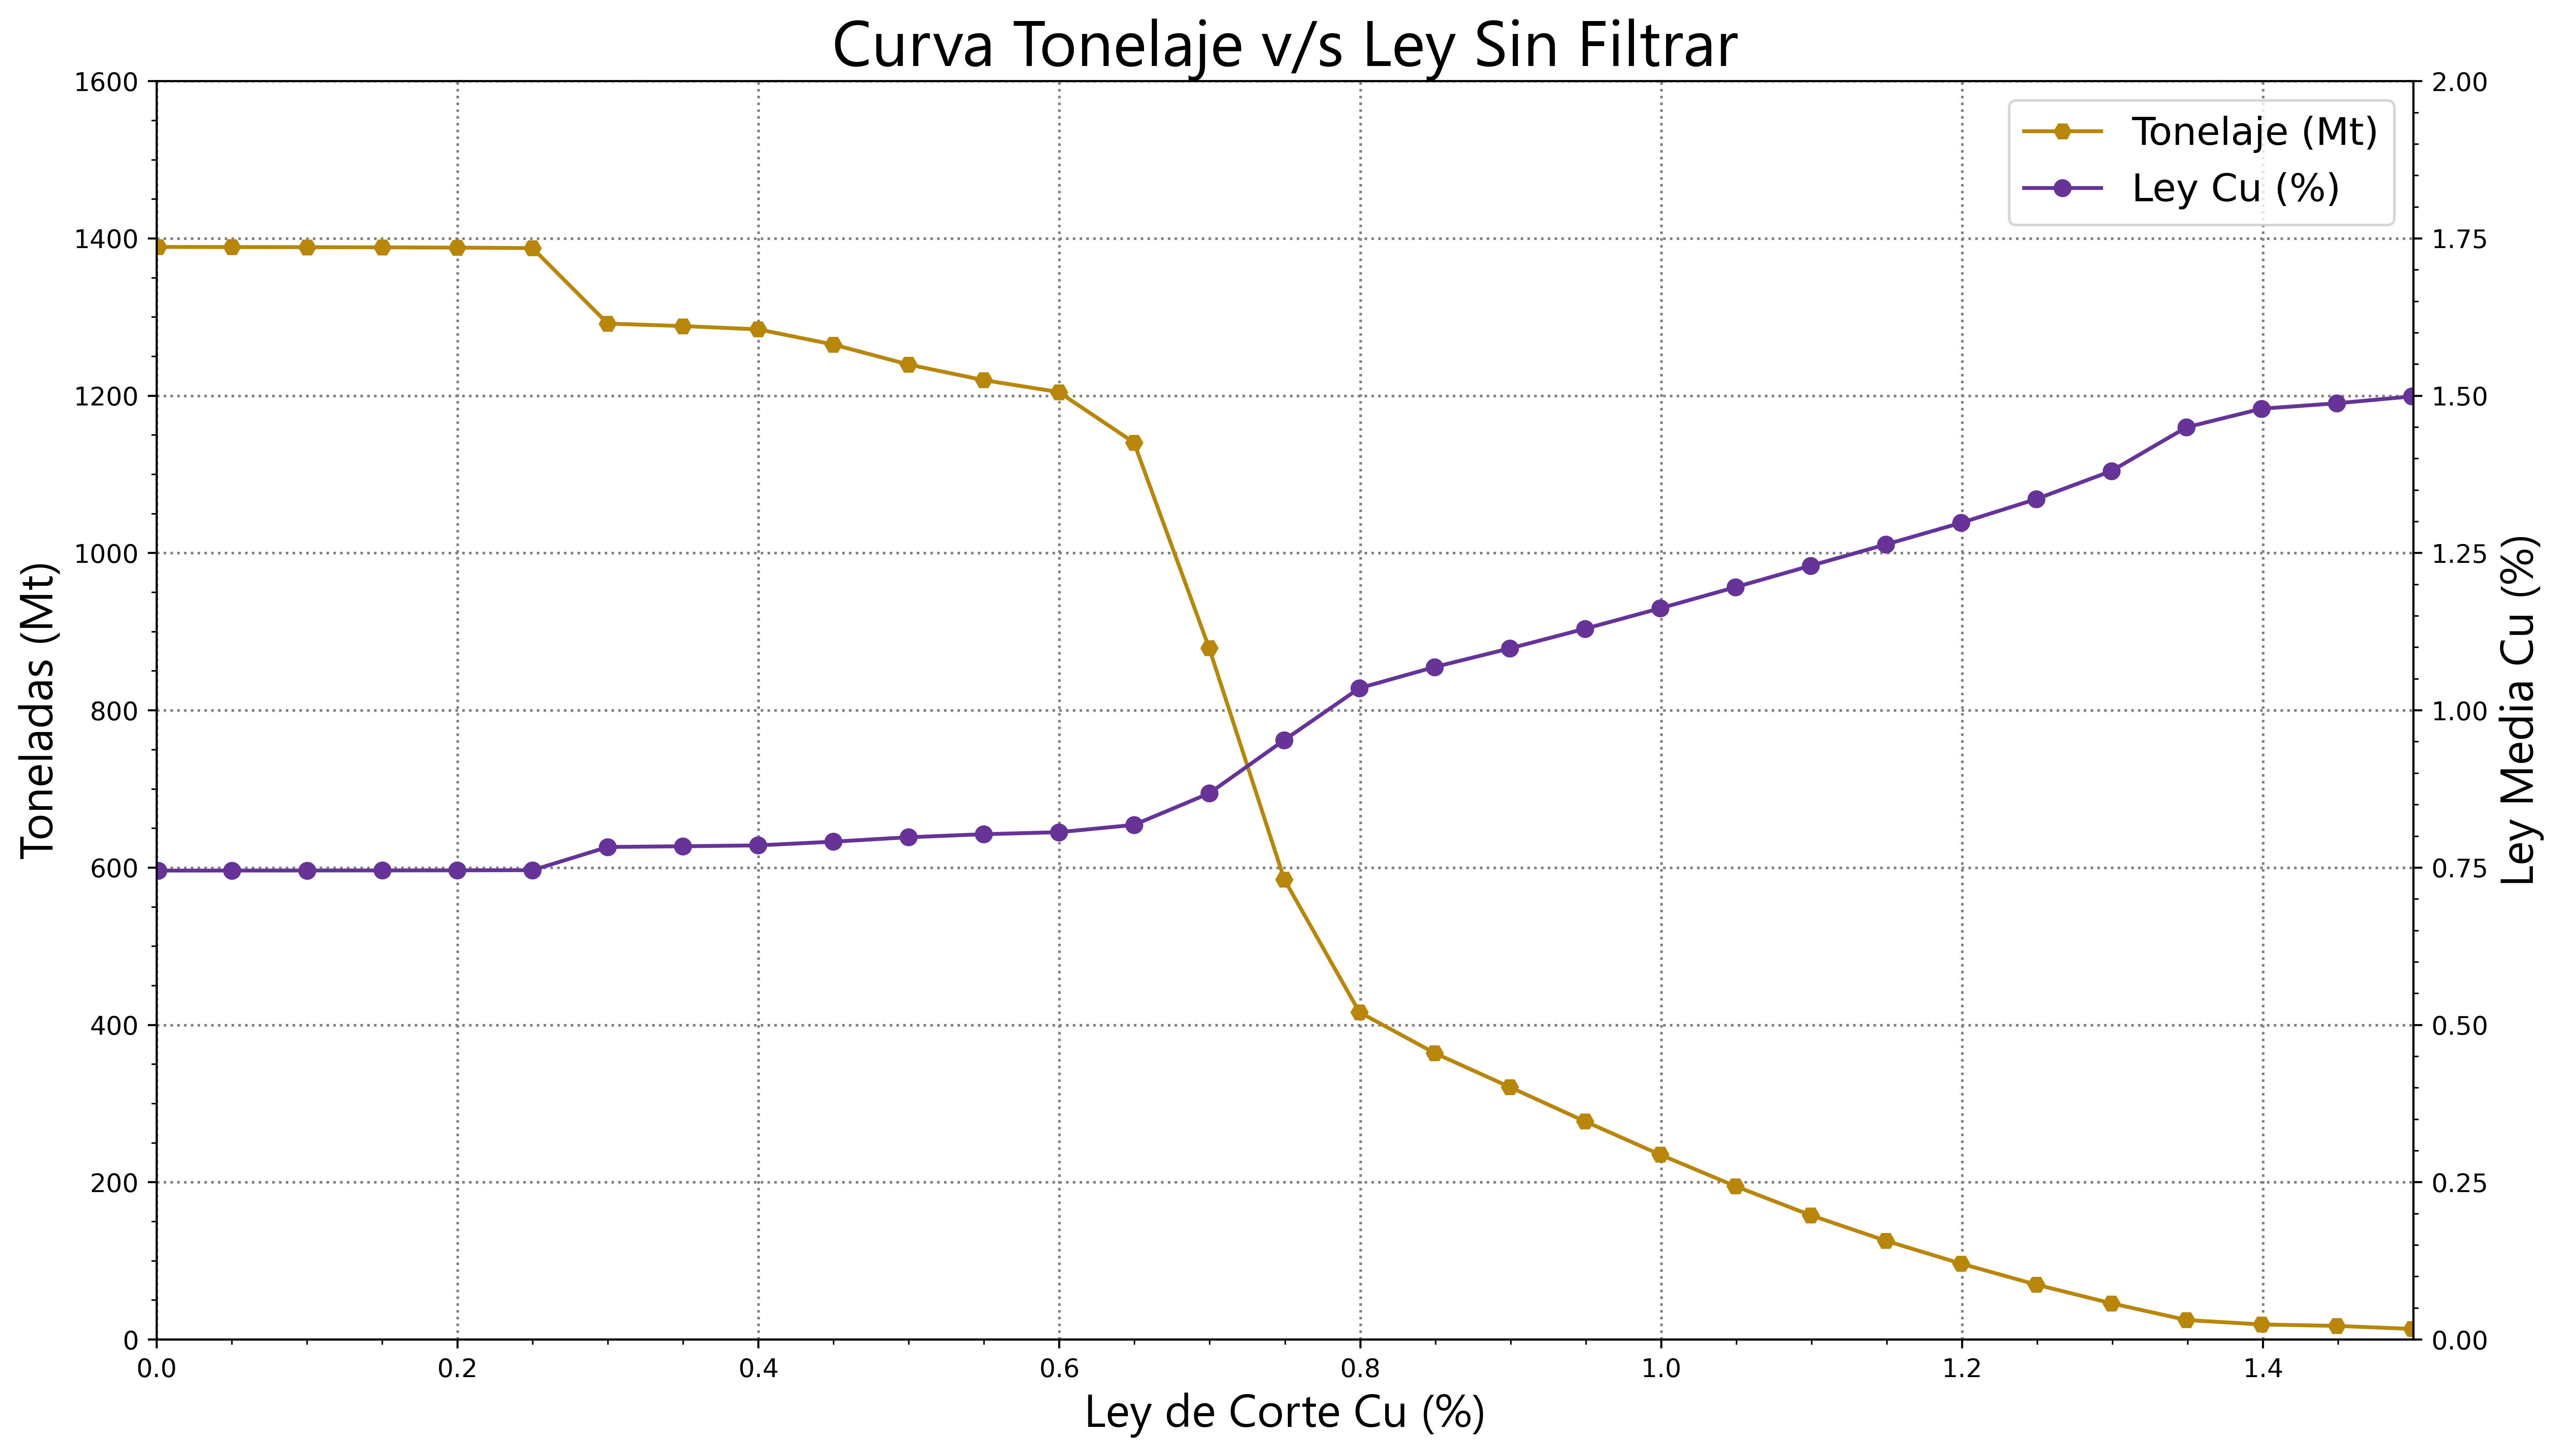

In [6]:
rc('mathtext', default='regular')
csfont = {'fontname':'Segoe UI'}
hfont = {'fontname':'Segoe UI'}

fig = plt.figure(figsize=(14,8),dpi=500)
ax = fig.add_subplot(111)

lns1=ax.plot(Mclase,ton,"darkgoldenrod",label="Tonelaje (Mt)", linewidth=1.5,linestyle='-',marker='H')
ax.minorticks_on()

ax2 = ax.twinx()
lns2=ax2.plot(Mclase,Ley_Media,"rebeccapurple",label="Ley Cu (%)", linewidth=1.5,linestyle='-',marker='o')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=1,fontsize=15)
ax.set_ylim(0,1600) #By martin reyes 650 mb y 150 planificacion
plt.xlim(0,1.5)
plt.ylim(0,2)

ax.set_xlabel("Ley de Corte Cu (%)",fontsize=18,**hfont)
ax.set_ylabel("Toneladas (Mt)",fontsize=18,**hfont)
ax2.set_ylabel("Ley Media Cu (%)", fontsize=18,**hfont)
ax.grid(axis='both',color='Gray', linestyle='dotted', linewidth=1)
ax2.minorticks_on()
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.title ("Curva Tonelaje v/s Ley", fontsize=25, fontstyle="normal",**hfont)
plt.tight_layout()
plt.savefig("CTL_MBT_sdens0FINAL FILTRADOreal.png",bbox_inches='tight',transparent=True)
#plt.grid(which='both',axis='both',color='Gray', linestyle='dotted', linewidth=0.5)
plt.show()

## Curvas Suavizada por Interpolación

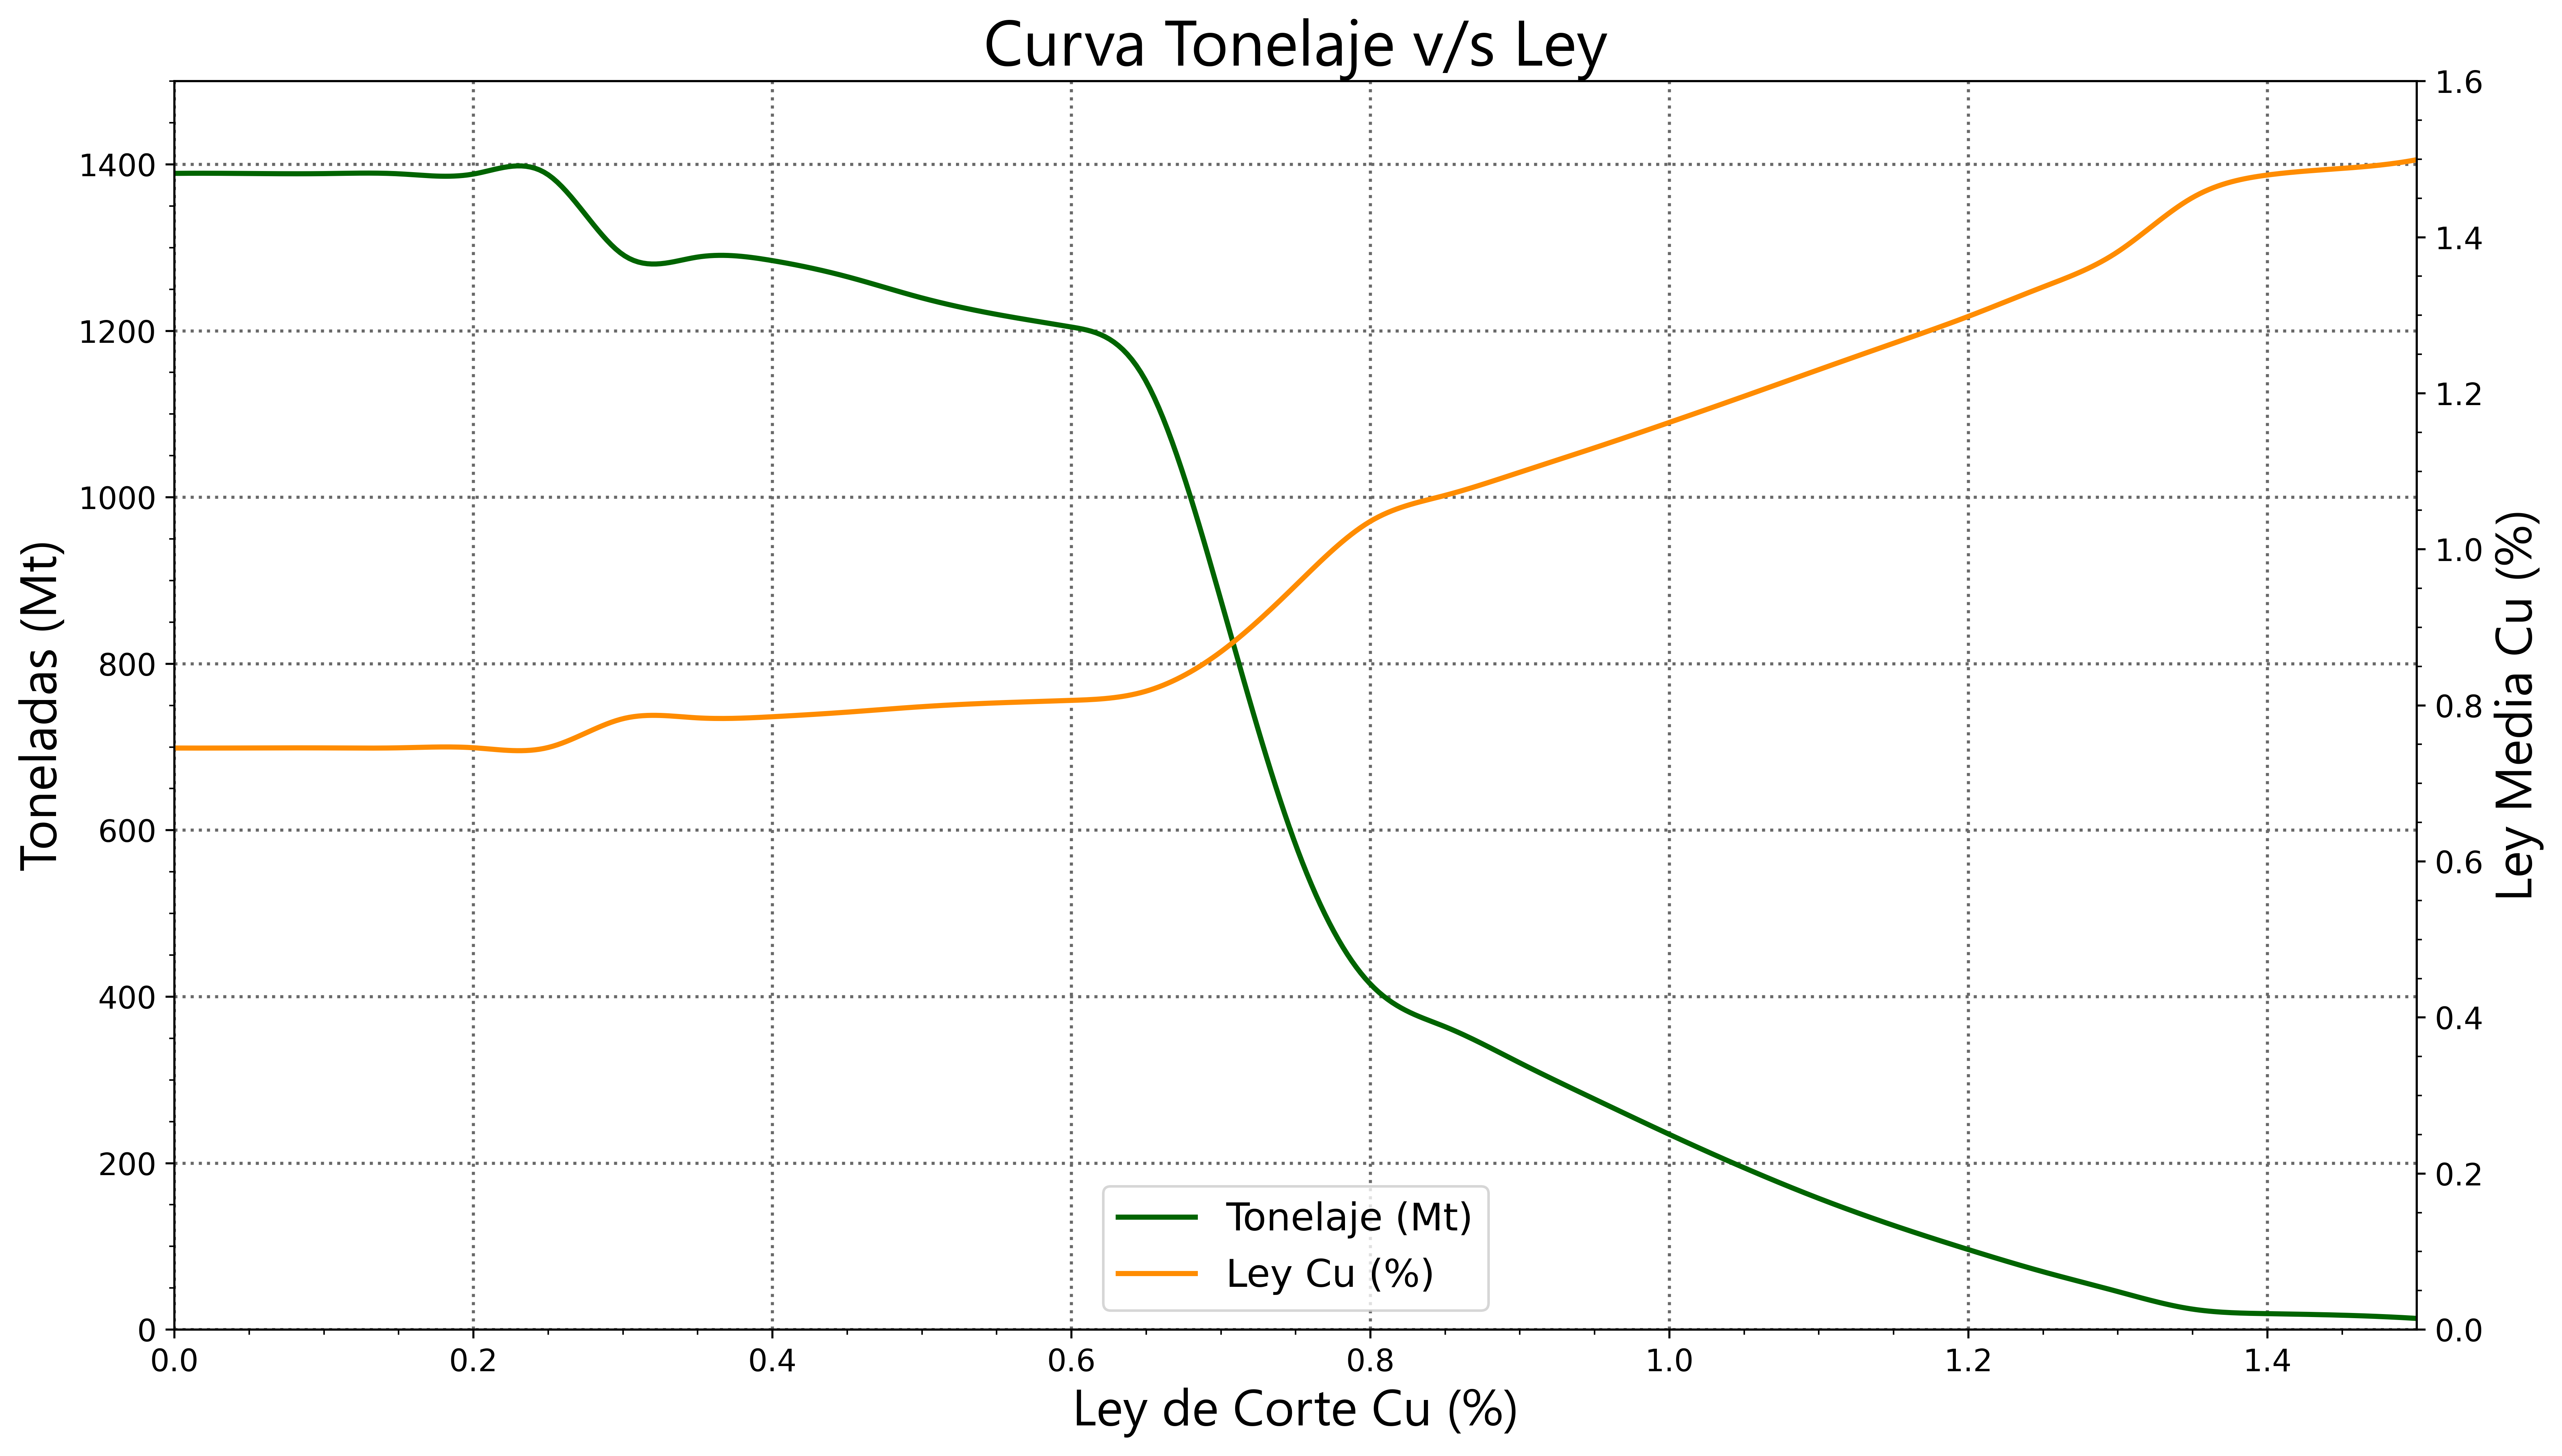

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

rc('mathtext', default='regular')
csfont = {'fontname':'Segoe UI'}
hfont = {'fontname':'Segoe UI'}
x=np.linspace(min(Mclase),max(Mclase),500) 
y1=make_interp_spline(Mclase,ton)(x)
y2=make_interp_spline(Mclase,Ley_Media)(x)
fig = plt.figure(figsize=(14,8),dpi=500)
ax = fig.add_subplot(111)

lns1=ax.plot(x,y1,"darkgreen",label="Tonelaje (Mt)", linewidth=2,linestyle='-')
ax.minorticks_on()

ax2 = ax.twinx()
lns2=ax2.plot(x,y2,"darkorange",label="Ley Cu (%)", linewidth=2,linestyle='-')

plt.rc('xtick', labelsize=15)

plt.rc('ytick', labelsize=15)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=8,fontsize=15)
ax.set_ylim(0,1500) 
plt.xlim(0,1.5)
plt.ylim(0,1.6)


ax.set_xlabel("Ley de Corte Cu (%)",color='black',fontsize=20,**hfont)

ax.set_ylabel("Toneladas (Mt)",fontsize=20,**hfont)

ax2.set_ylabel("Ley Media Cu (%)", fontsize=20,**hfont)

ax.grid(axis='both',color='dimgray', linestyle='dotted', linewidth=1.2)

ax2.minorticks_on()




plt.title ("Curva Tonelaje v/s Ley", fontsize=25, fontstyle="normal",**hfont)



plt.tight_layout()
plt.savefig("CTL_MBT_sdens0FINAL FILTRADO.png",bbox_inches='tight',transparent=True)
#plt.grid(which='both',axis='both',color='Gray', linestyle='dotted', linewidth=0.5)
plt.show()